<a href="https://colab.research.google.com/github/Dhanya-Zac/NLP/blob/main/DistilBERT_Sentiment_Analysis_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud matplotlib
%matplotlib inline

In [ ]:

# Load CSV file into a DataFrame without header
df = pd.read_csv("/content/ch4_feedback_data.csv", header=None)

In [ ]:
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are not good. I really don't lik...,delivery to my location in Los Angeles was a ...


In [ ]:
from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
#tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
sentiment_analysis_bert = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Iterate over the rows and perform sentiment analysis with DistilBERT
sentiment_results_bert = []
for index, row in df.iterrows():
    text = row[0]  # Access the first (and only) column in each row
    bert_result = sentiment_analysis_bert(text)[0]
    sentiment_label_bert = bert_result['label']
    sentiment_score_bert = bert_result['score']
    sentiment_results_bert.append({"Text": text, "Sentiment Score": sentiment_score_bert, "Sentiment Label": sentiment_label_bert})


# Iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
    print(f"Text: {result['Text']}")
    print(f"Sentiment Score: {result['Sentiment Score']}")
    print(f"Sentiment Label: {result['Sentiment Label']}")
    print()  # Add a blank line for readability

# Convert DistilBERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

# Save DistilBERT sentiment results to a new CSV file
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)


In [ ]:

sentiment_df_bert.head()

,Text,Sentiment Score,Sentiment Label
0,Your products are excellent. I really love the...,0.574427,5 stars
1,The customer service team in New York was help...,0.554317,4 stars
2,The new features in the latest release are fan...,0.835703,5 stars
3,The product didn't meet my expectations,0.478028,2 stars
4,Your products are not good. I really don't lik...,0.513806,2 stars


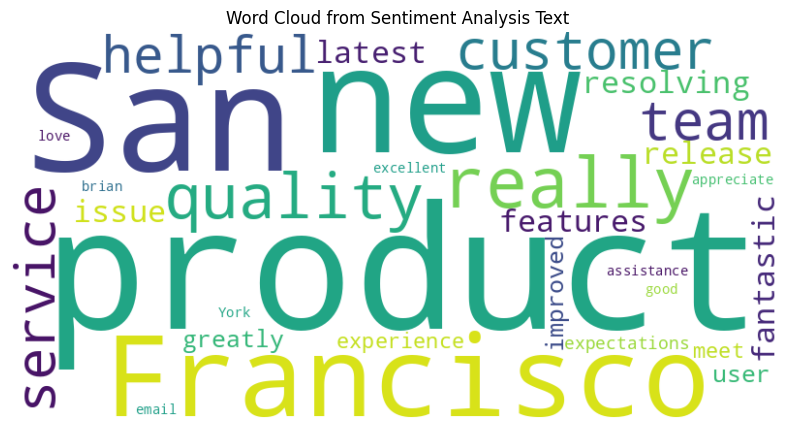

In [ ]:
from wordcloud import WordCloud


# Assuming you have already performed sentiment analysis and have sentiment_df_bert DataFrame

# Combine all text data into a single string for word cloud generation
text_combined = ' '.join(sentiment_df_bert['Text'])

# Create a WordCloud object with specific settings (e.g., background color, colormap)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes for better visualization
plt.title('Word Cloud from Sentiment Analysis Text')
plt.show()

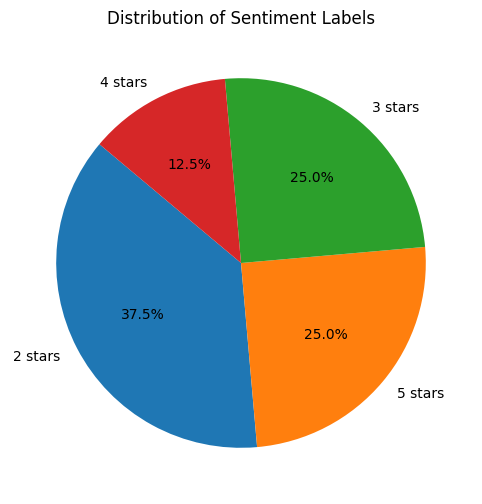

In [ ]:
# Count the occurrences of each sentiment label
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting pie chart for sentiment labels
plt.figure(figsize=(8, 6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.show()

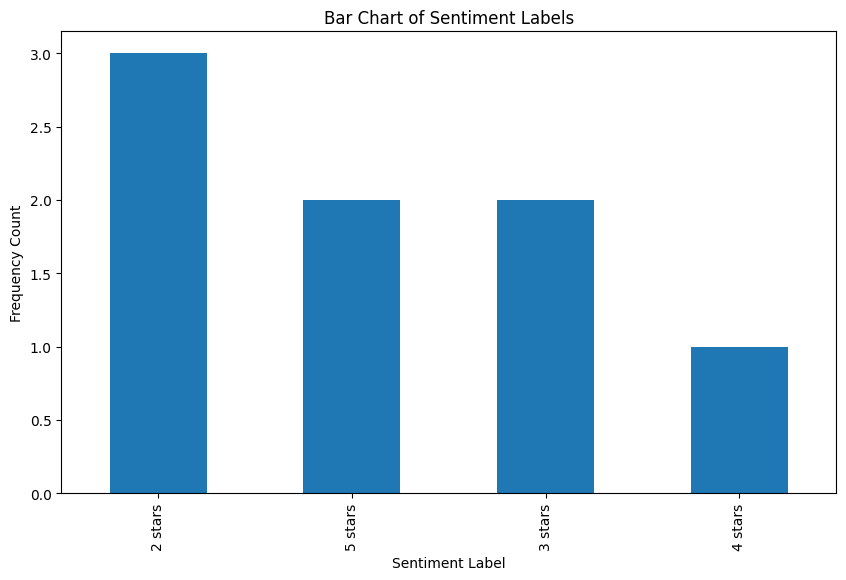

In [ ]:
# Count the occurrences of each sentiment label for visualization
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting stacked bar chart for sentiment labels
plt.figure(figsize=(10, 6))
sentiment_label_counts.plot(kind='bar', stacked=True)
plt.title('Bar Chart of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency Count')
plt.show()